# Lab 1. An Introduction to Pandas and Python

In [1]:
# boilerplate package imports, w/ aliasing

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline

In [2]:
# create a dataframe i.e. table/spreadsheet structure from all.csv

df = pd.read_csv("all.csv", header=None,
                names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)

`df`, in python parlance, is an **instance** of the `pd.DataFrame` class, created by calling the `pd.read_csv` function, which cllas the DataFrame constructor inside of it. If you dont understand this sentence, dont worry, it will become clearer later. What you need to take away is that `df` is a dataframe object, and it has **methods**, or functions belonging to it, which allow it to do things. For example `df.head()` is a method that shows the first 5 rows of the dataframe.

In [3]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Basic Functions

In [4]:
# data types for columns in data frame
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [5]:
# dimensionality: rows x cols i.e. examples x features
print df.shape

# result is a tupel, so use [] to access individual value

print df.shape[0] # rows
print df.shape[1] # cols

(6000, 10)
6000
10


![](./Resources/pandastruct.png)

In [6]:
# column names
df.columns

Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')

In [7]:
# data frame = horizontal collection of "series" of data
type(df.rating), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### How to query the data frame

In [8]:
df.rating < 3

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5970    False
5971    False
5972    False
5973    False
5974    False
5975    False
5976    False
5977    False
5978    False
5979     True
5980    False
5981    False
5982    False
5983    False
5984    False
5985    False
5986    False
5987    False
5988    False
5989    False
5990    False
5991    False
5992    False
5993    False
5994    False
5995    False
5996    False
5997    False
5998    False
5999    False
Name: rating, Length: 6000, dtype: bool

This gives us `True`s and `False`s. Such a series is called a mask. If we count the number of `True`s, and divide by the total, we'll get the fraction of ratings $\lt$ 3. To do this numerically see this:

In [9]:
# no. of ratings < 3 in df
np.sum(df.rating < 3)

4

In [10]:
# different ways of finding percentage of true queries:

print np.sum(df.rating < 3)/float(df.shape[0])
print np.mean(df.rating < 3.0)
print (df.rating < 3).mean()

0.000666666666667
0.000666666666667
0.000666666666667


### Filtering

In [11]:
df.query("rating > 4.5")

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
17,4.58,1314,0345538374,good_reads:book,https://www.goodreads.com/author/show/656983.J...,1973.0,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495,J.R.R. Tolkien 4-Book Boxed Set
162,4.55,15777,075640407X,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2007.0,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018,The Name of the Wind (The Kingkiller Chronicle...
222,4.53,15256,055357342X,good_reads:book,https://www.goodreads.com/author/show/346732.G...,2000.0,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992,"A Storm of Swords (A Song of Ice and Fire, #3)"
242,4.53,5404,0545265355,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2010.0,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330,The Hunger Games Trilogy Boxset (The Hunger Ga...
249,4.80,644,0740748475,good_reads:book,https://www.goodreads.com/author/show/13778.Bi...,2005.0,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674,The Complete Calvin and Hobbes
284,4.58,15195,1406321346,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2013.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)"
304,4.54,572,0140259449,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1933.0,/genres/classics|/genres/fiction|/genres/roman...,dir04/14905.The_Complete_Novels.html,17539,The Complete Novels
386,4.55,8820,0756404738,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2011.0,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir04/1215032.The_Wise_Man_s_Fear.html,142499,"The Wise Man's Fear (The Kingkiller Chronicle,..."
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)"
475,4.57,824,1416997857,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2009.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/6485421-the-mortal-instruments-boxed-set...,39720,The Mortal Instruments Boxed Set (The Mortal I...


In [12]:
# alternatively, using a mask to get desired indices:
df[df.year < 0]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
47,3.68,5785,0143039954,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248,The Odyssey
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
455,3.85,1499,0140449140,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-380.0,/genres/philosophy|/genres/classics|/genres/no...,dir05/30289.The_Republic.html,82022,The Republic
596,3.77,1240,0679729526,good_reads:book,https://www.goodreads.com/author/show/919.Virgil,-29.0,/genres/classics|/genres/poetry|/genres/fictio...,dir06/12914.The_Aeneid.html,60308,The Aeneid
629,3.64,1231,1580495931,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-429.0,/genres/classics|/genres/plays|/genres/drama|/...,dir07/1554.Oedipus_Rex.html,93192,Oedipus Rex
674,3.92,3559,1590302257,good_reads:book,https://www.goodreads.com/author/show/1771.Sun...,-512.0,/genres/non-fiction|/genres/politics|/genres/c...,dir07/10534.The_Art_of_War.html,114619,The Art of War
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
777,3.52,1038,1580493882,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-442.0,/genres/drama|/genres/fiction|/genres/classics...,dir08/7728.Antigone.html,49084,Antigone
1233,3.94,704,015602764X,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-400.0,/genres/classics|/genres/plays|/genres/drama|/...,dir13/1540.The_Oedipus_Cycle.html,36008,The Oedipus Cycle
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables


In [13]:
# combine queries with mask technique
df[(df.year < 0) & (df.rating > 4.5 )] # none
df[(df.year < 0) & (df.rating > 4 )]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables
1882,4.02,377,0872205541,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir19/22632.The_Trial_and_Death_of_Socrates.html,18712,The Trial and Death of Socrates
3133,4.30,131,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454,Complete Works
4475,4.11,281,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390.0,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478,Apology
5367,4.07,133,0872206335,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-360.0,/genres/philosophy|/genres/classics|/genres/no...,dir54/30292.Five_Dialogues.html,9964,Five Dialogues


### Cleaning

In [14]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice `object` types i.e. `string` or other non-primitive type not resolved by pandas  
Notice year is a `float`, we could easily work with year as an `int`

In [15]:
# attempt to set logical data type

df['rating_count']=df.rating_count.astype(int)
df['review_count']=df.review_count.astype(int)
df['year']=df.year.astype(int)

ValueError: invalid literal for long() with base 10: 'None'

Failures to convert `None` to `int`... Why?  
**Data is probably missing**

In [16]:
# query mask for nulls
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [17]:
# remove rows with empties by assigning df to query result

df = df[df.year.notnull()]
df.shape

(5993, 10)

In [18]:
df['rating_count']=df.rating_count.astype(int)
df['review_count']=df.review_count.astype(int)
df['year']=df.year.astype(int)

In [19]:
# better
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

### Visualization

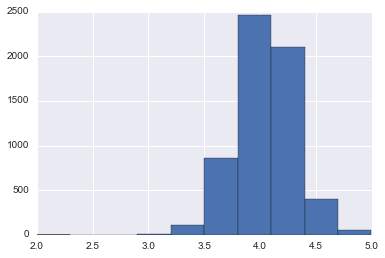

In [20]:
df.rating.hist();

**Adding axes, legend, title etc.**

In [21]:
# a few ways to compute mean and median
print df.rating.mean(), np.mean(df.rating), df.rating.median()

4.04199733022 4.04199733022 4.05


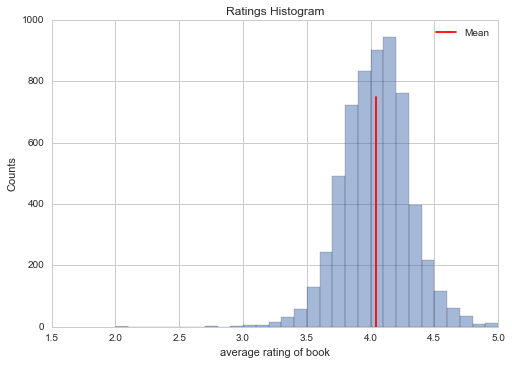

In [22]:
# plot against mean, with custom binsize or number of bins ...

sns.set_context("notebook")
meanrat=df.rating.mean()

with sns.axes_style("whitegrid"):
    df.rating.hist(bins=30, alpha=0.5);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()

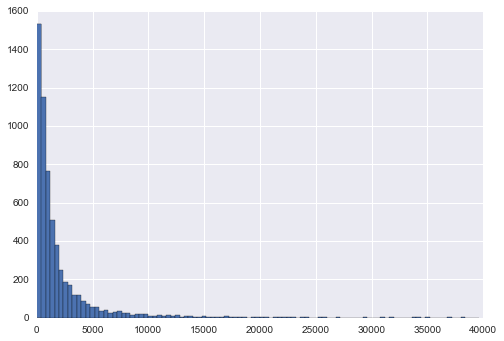

In [23]:
df.review_count.hist(bins=np.arange(0, 40000, 400))

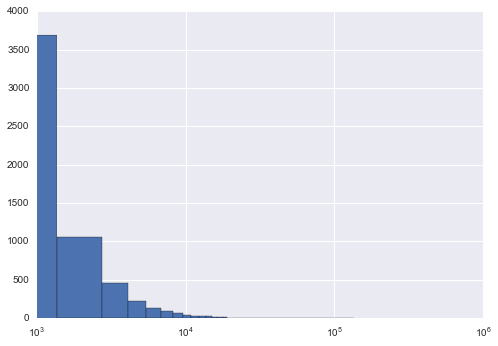

In [24]:
df.review_count.hist(bins=100)
plt.xscale("log");

Can see that few books have a substantial review_count i.e. something to normalize for when making predictive models

**Scatterplot of rating vs. year**  
By setting the alpha transparency low we can how the density of highly rated books on goodreads has changed.

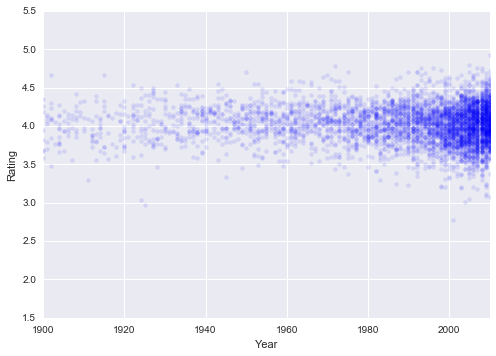

In [27]:
plt.scatter(df.year, df.rating, lw=0, alpha=0.1)
plt.xlim([1900,2010])
plt.xlabel("Year")
plt.ylabel("Rating")

### List property of Python
**We used df series' as list type arguments in plt functions**  
Similarly, list properties 'listiness' work also on dictionaries, files, and with iterators.

In [28]:
# iterator -> list comprehension
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

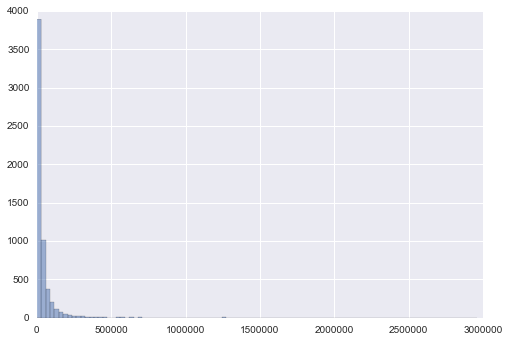

In [32]:
# plt.hist function takes in list, other objects in our df may also behave like lists so...
plt.hist(df.rating_count.values, bins=100, alpha=0.5);

In [33]:
print type(df.rating_count), type(df.rating_count.values)

<class 'pandas.core.series.Series'> <type 'numpy.ndarray'>


** TLDR: Series and numpy arrays behave like standard Python lists as well **

### Vectorization

**Still,** Numpy arrays are a bit __different__ from regular python lists, and are the bread and butter of data science.  
Pandas Series are built atop them. 

In [34]:
# + operator with standard list
alist + alist

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [35]:
np.array(alist)

array([1, 2, 3, 4, 5])

In [37]:
# + operator with np list
np.array(alist)+np.array(alist)

array([ 2,  4,  6,  8, 10])

In [38]:
np.array(alist)**2

array([ 1,  4,  9, 16, 25])

#### i.e. Operations on numpy arrays, and by extension, Pandas Series, are **vectorized** (element-wise)

You can add two numpy lists by just using `+` whereas the result isnt what you might expect for regular python lists.  
To add regular python lists elementwise, you will need to use a loop:

In [39]:
newlist=[]
for item in alist:
    newlist.append(item+item)
newlist

[2, 4, 6, 8, 10]

For almost all data intensive computing, use numpy arrays rather than python lists, as the python numerical stack is based on it.  
Eg. in spreadsheets where you add an entire column to another one.

In [41]:
a=np.array([1,2,3,4,5])
print type(a)
b=np.array([1,2,3,4,5])

print a*b
print a + 1
# expect element by element i.e. vector computation

<type 'numpy.ndarray'>
[ 1  4  9 16 25]
[2 3 4 5 6]
